In [10]:
import pathlib
import pandas
path = pathlib.Path('/home/yi/MEGAsync/NeuralODE_Resuls/spiral2d_experiment/20191112_010728/')
pandas.read_csv(path/'1'/'loss.csv', index_col=0, header=None, names=['step', 'loss', 'time']).tail()

,loss,time
step,,
995,0.000124,1.896482
996,0.000145,4.583166
997,0.000369,1.580400
998,0.000166,1.264322
999,0.000113,3.318846


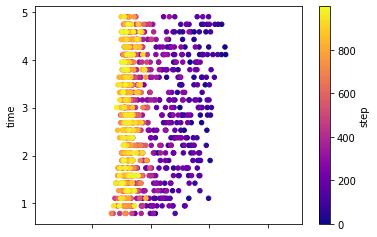

In [17]:
from matplotlib import cm
pandas.read_csv(path/'1'/'loss.csv', header=None, names=['step', 'loss', 'time']).plot.scatter('time', 'loss', c='step', colormap=cm.plasma, logx=True)

In [21]:
results = pandas.concat([pandas.read_csv(path/str(i+1)/'loss.csv', header=None, names=['step', 'loss', 'time']) for i in range(100)], axis=0)
len(results)

100000

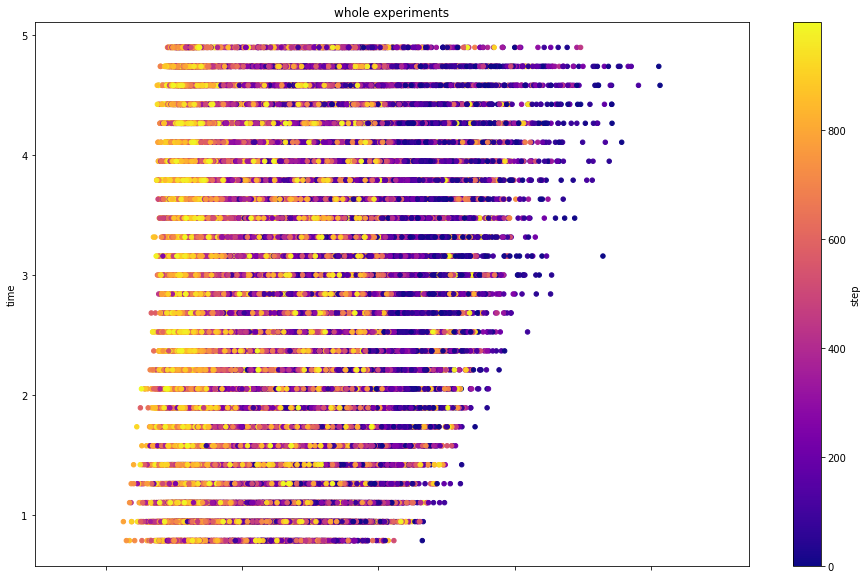

In [29]:
from matplotlib import cm
pandas.concat(
    [pandas.read_csv(path/str(i+1)/'loss.csv', header=None, names=['step', 'loss', 'time']) for i in range(100)],
    axis=0,
).plot.scatter(
    'loss', 'time', c='step',
    colormap=cm.plasma, logx=True, title='whole experiments',
    figsize=(16,10)
)

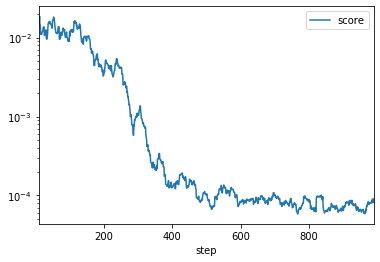

In [57]:
result1 = pandas.read_csv(path/'1'/'loss.csv', header=None, names=['step', 'loss', 'time'])
result1['score'] = result1['loss']/result1['time']
result1.rolling(20, center=True).mean().plot('step', 'score', logy=True)

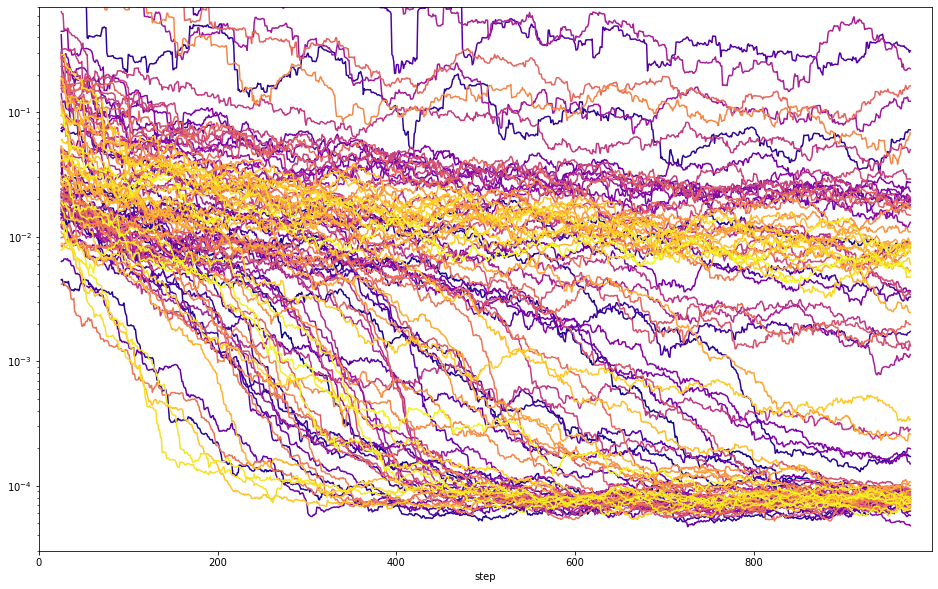

In [80]:
score_df = pandas.DataFrame()
for i in range(100):
    df = pandas.read_csv(path/str(i+1)/'loss.csv', header=None, names=['step', 'loss', 'time'])
    score_df['step'] = df['step']
    score_df[str(i+1)] = (df['loss'] / df['time']).rolling(50, center=True).mean()
score_df.plot(x='step', logy=True, figsize=(16, 10), colormap=cm.plasma, legend=False, ylim=(3.0e-5, 0.7))